### Importing Libraries

In [1]:
# basic libraries
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# Interactive shells
from IPython.display import display

# handling warnings
import warnings
warnings.filterwarnings('ignore')

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16,8)
plt.style.use('fivethirtyeight')

In [2]:
# Read the dataset
data = pd.read_csv('movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# check the info of the data columnwise
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
# Remove unnecessary functions using drop function

data = data.drop(['color', 'director_facebook_likes', 'actor_3_facebook_likes',
                 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'actor_2_facebook_likes',
                 'facenumber_in_poster', 'movie_imdb_link', 'content_rating', 'country',
                 'aspect_ratio', 'plot_keywords'], axis=1)
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [5]:
# check the rows having high percentage of missing values

round(100*(data.isnull().sum()/len(data.index)), 2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [6]:
# 'budget' and 'gross' have highest number of rows with NaN values

data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [7]:
# the rows which has the sum of null values less than 2 are retained

data = data[data.isnull().sum(axis=1)<= 2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [8]:
# Impute the missing values

# using mean for columns containing numerical values
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace=True)
data['duration'].fillna(data['duration'].mean(), inplace=True)

# using mode for categorical columns
data['language'].fillna(data['language'].mode()[0], inplace=True)

# 'unknown actor' for actor column
data['actor_2_name'].fillna('Unknown Actor', inplace=True)
data['actor_3_name'].fillna('Unknown Actor', inplace=True)

# check for any missing values
data.isnull().sum().sum()

0

### Feature Engineering

In [9]:
# convert 'gross' and 'budget' column values from $ to Million $ to make analysis easier
data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [10]:
# create profit column
data['Profit'] = data['gross'] - data['budget']

# Check the list of top 10 profitable movies
data[['movie_title', 'Profit']].sort_values(by='Profit', ascending=False).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
794,The Avengers,403.279547
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061


In [11]:
# from above data, it is noticeable that there are some duplicates

print("No. of rows before removing duplicates: ", data.shape[0])

data.drop_duplicates(subset=None, keep='first', inplace=True)

print("No, of rows after removing duplicates:", data.shape[0])

No. of rows before removing duplicates:  3888
No, of rows after removing duplicates: 3853


In [12]:
# Top 10 profitable movies

data[['movie_title', 'Profit']].sort_values(by='Profit', ascending=False).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


In [13]:
# No. of movies in each language
data['language'].value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Hebrew           3
Persian          3
Danish           3
Dutch            3
Thai             3
Aboriginal       2
Dari             2
Indonesian       2
Russian          1
Czech            1
Mongolian        1
None             1
Hungarian        1
Arabic           1
Zulu             1
Bosnian          1
Icelandic        1
Filipino         1
Maya             1
Swedish          1
Kazakh           1
Vietnamese       1
Telugu           1
Dzongkha         1
Aramaic          1
Romanian         1
Name: language, dtype: int64

In [14]:
# Categorize movies other than English as Foreign language movies

def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'
    
data['language'] = data['language'].apply(language)

data['language'].value_counts()

English    3673
Foreign     180
Name: language, dtype: int64

In [15]:
# categorize movie length as short and long

def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'

data['duration'] = data['duration'].apply(duration)

data['duration'].value_counts()

Short    2936
Long      917
Name: duration, dtype: int64

In [16]:
# Check the number of movies in each genre

data['genres'].value_counts()

Drama                                      153
Comedy|Drama|Romance                       151
Comedy|Drama                               147
Comedy                                     145
Comedy|Romance                             135
                                          ... 
Action|Adventure|Drama|Thriller|Western      1
Action|Comedy|Drama|Family|Thriller          1
Drama|History|War|Western                    1
Crime|Drama|Mystery|Thriller|Western         1
Crime|Drama|Film-Noir|Mystery|Thriller       1
Name: genres, Length: 762, dtype: int64

In [17]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [18]:
data['Moviegenres'] = data['genres'].str.split('|')

data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])
data[['genres', 'Genre1', 'Genre2', 'Genre3', 'Genre4']].head()

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


### Data Visualizaton

   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


Text(0.5, 0, '')

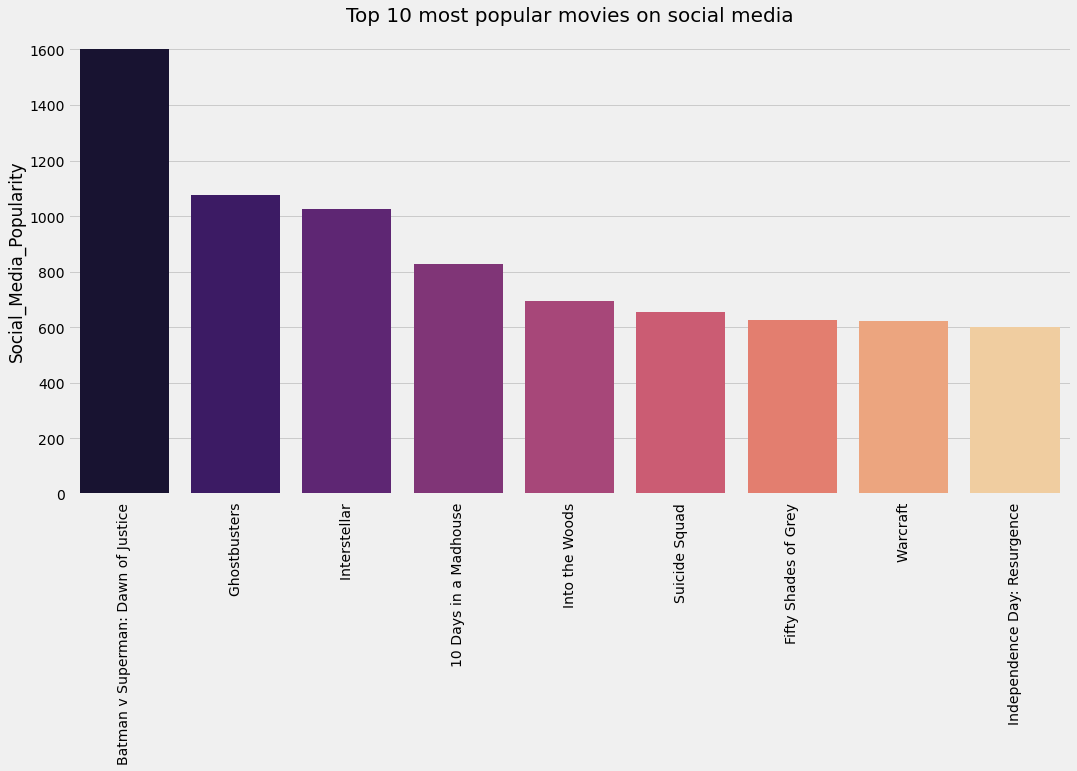

In [19]:
# Calculate the social media popularity of the movies

data['Social_Media_Popularity'] = (data['num_user_for_reviews']/data['num_voted_users'])*data['movie_facebook_likes']

# Top 10 popular movies on social media
x = data[['movie_title', 'Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity', 
                                                    ascending=False).head(10).reset_index()
print(x)

sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette='magma')
plt.title('Top 10 most popular movies on social media', fontsize=20)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('')

The Most Profitable Movie from each Genre


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


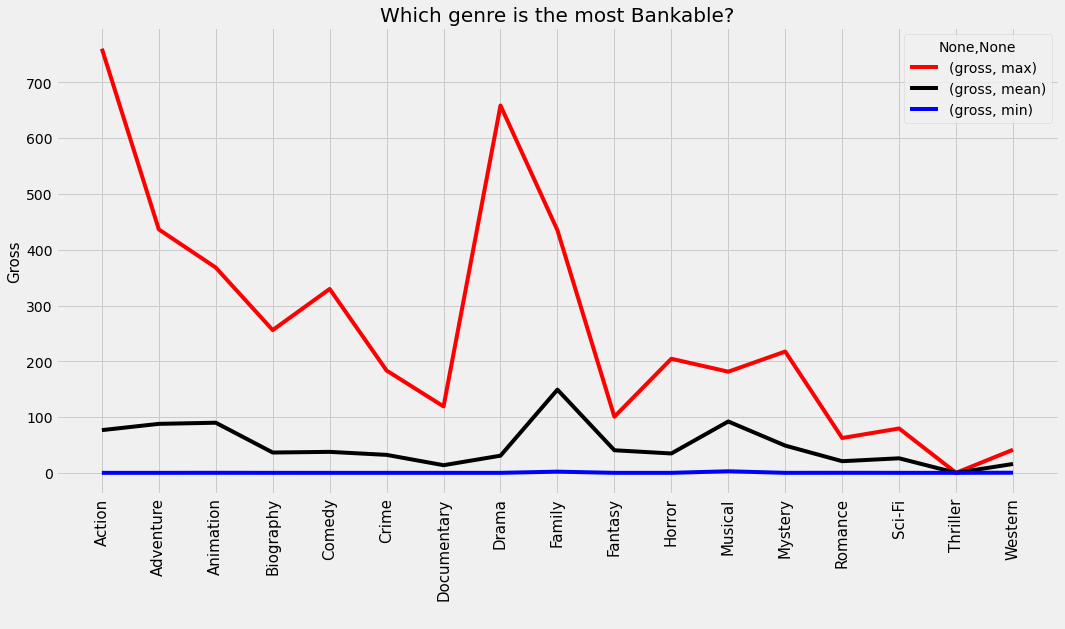

In [20]:
# Comparing gross with genres

display(data[['Genre1', 'gross']].groupby(['Genre1']).agg(['max', 
                                            'mean', 'min']).style.background_gradient(cmap='Reds'))

data[['Genre1', 'gross']].groupby(['Genre1']).agg(['max', 'mean', 'min']).plot(kind="line", color=['red', 'black', 'blue'])

plt.title('Which genre is the most Bankable?', fontsize=20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation =90, fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.xlabel(' ')

print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                                    'movie_title','gross']].style.background_gradient(cmap = 'Blues'))

Most profitable years in Box Office


Movies that made huge Losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


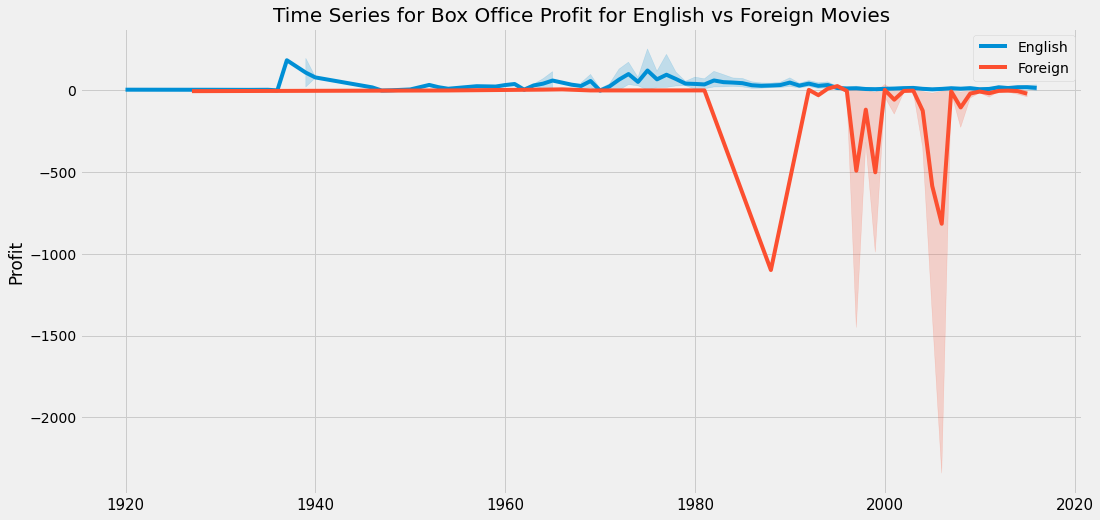

In [21]:
# Convert year into integer

data['title_year'] = data['title_year'].astype('int')

print('Most profitable years in Box Office')
display(data[['title_year', 'language', 'Profit']].groupby(['language',
                                    'title_year']).agg('sum').sort_values(by='Profit',
                                    ascending=False).head(10).style.background_gradient(cmap='Greens'))

sns.lineplot(data['title_year'], data['Profit'], hue=data['language'])
plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('')
plt.legend()

print('Movies that made huge Losses')
display(data[data['Profit']<-2000][['movie_title', 
                                    'language', 'Profit']].style.background_gradient(cmap='Reds'))

,movie_title,duration,gross,Profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
17,The Avengers,Long,623.279547,403.279547


,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,Short,434.949459,424.449459
509,The Lion King,Short,422.783777,377.783777
812,Deadpool,Short,363.024263,305.024263
521,Despicable Me 2,Short,368.049635,292.049635
338,Finding Nemo,Short,380.838870,286.838870


Text(0.5, 1.0, 'Gross Comparison')

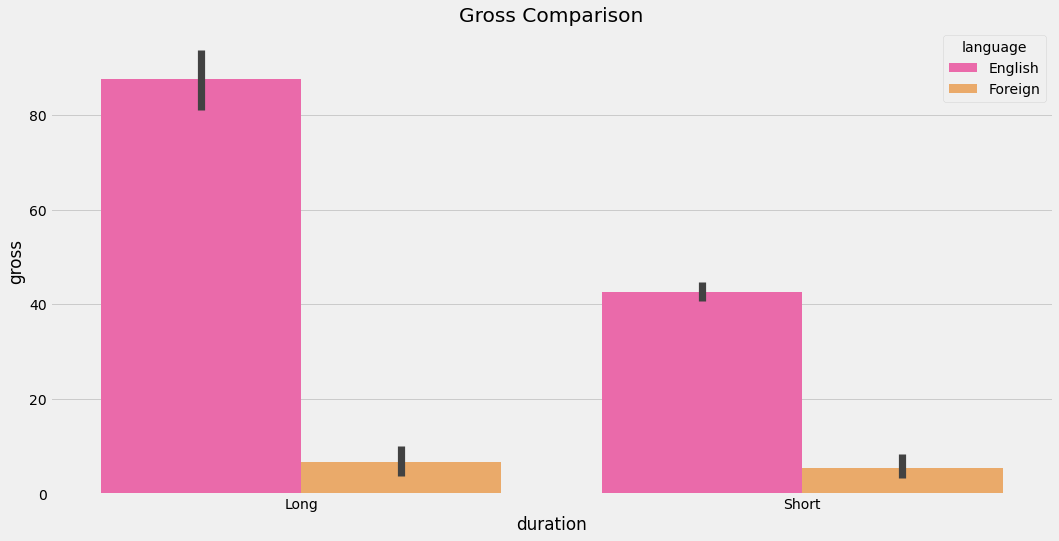

In [22]:
display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross',
                                    'Profit']].sort_values(by='Profit',
                                ascending=False).head().style.background_gradient(cmap='spring'))

display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross',
                                    'Profit']].sort_values(by='Profit',
                                ascending=False).head().style.background_gradient(cmap='spring'))

sns.barplot(data['duration'], data['gross'], hue=data['language'], palette='spring')
plt.title('Gross Comparison')

Average IMDB score for long duration movies is 7.06
Average IMDB score for Short duration movies is 6.28

 Highest rated long duration movie:
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

 Highest rated short duration movie:
               movie_title  imdb_score
3592  The Usual Suspects          8.6


Text(0.5, 1.0, 'IMDB Ratings vs Gross')

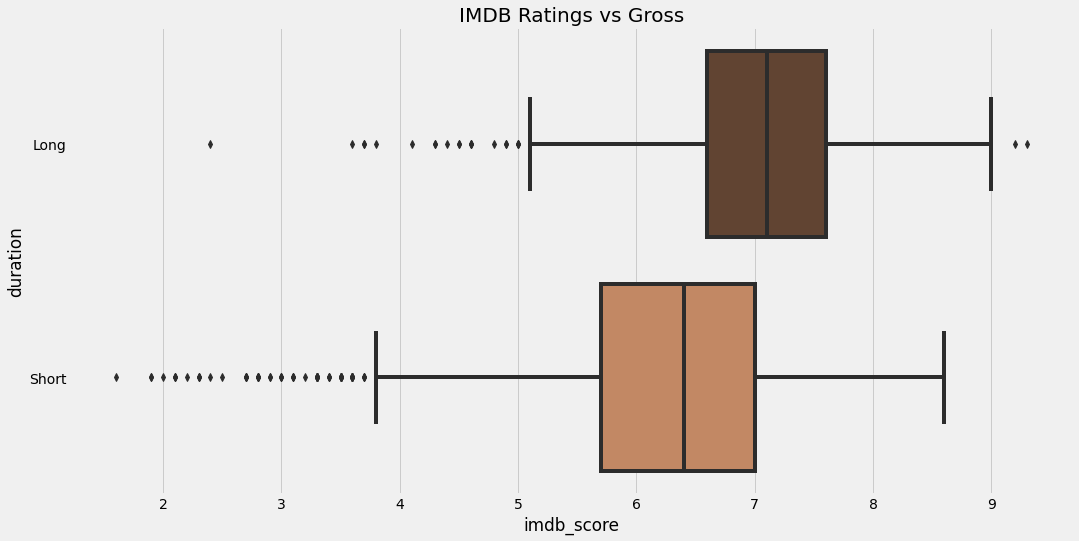

In [23]:
print('Average IMDB score for long duration movies is {0:.2f}'.format(data[data['duration']=='Long']['imdb_score'].mean()))
print('Average IMDB score for Short duration movies is {0:.2f}'.format(data[data['duration']=='Short']['imdb_score'].mean()))

print('\n Highest rated long duration movie:\n', 
      data[data['duration']=='Long'][['movie_title', 'imdb_score']].sort_values(by='imdb_score',
                                                                    ascending=False).head(1))

print('\n Highest rated short duration movie:\n', 
      data[data['duration']=='Short'][['movie_title', 'imdb_score']].sort_values(by='imdb_score',
                                                                    ascending=False).head(1))

sns.boxplot(data['imdb_score'], data['duration'], palette='copper')
plt.title('IMDB Ratings vs Gross', fontsize=20)


In [24]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    y = y[['movie_title', 'budget', 'gross', 'title_year', 
           'genres', 'language', 
           'imdb_score']].sort_values(by='imdb_score', ascending=False).set_index('movie_title')
    return y

In [25]:
query_actors('Leonardo DiCaprio')

,budget,gross,title_year,genres,language,imdb_score
movie_title,,,,,,
Inception,160.0,292.568851,2010,Action|Adventure|Sci-Fi|Thriller,English,8.8
The Departed,90.0,132.373442,2006,Crime|Drama|Thriller,English,8.5
Django Unchained,100.0,162.804648,2012,Drama|Western,English,8.5
The Wolf of Wall Street,100.0,116.866727,2013,Biography|Comedy|Crime|Drama,English,8.2
The Revenant,135.0,183.635922,2015,Adventure|Drama|Thriller|Western,English,8.1
Shutter Island,80.0,127.968405,2010,Mystery|Thriller,English,8.1
Catch Me If You Can,52.0,164.435221,2002,Biography|Crime|Drama,English,8.0
Blood Diamond,100.0,57.366262,2006,Adventure|Drama|Thriller,English,8.0
What's Eating Gilbert Grape,11.0,9.170214,1993,Drama|Romance,English,7.8


In [26]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    print("Time:",y['title_year'].min(), y['title_year'].max())
    print("Max Gross : {0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross : {0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross : {0:.2f} Millions".format(y['gross'].min()))
    print("Number of 100 Million Movies :", y[y['gross'] > 100].shape[0])
    print("Avg IMDB Score : {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n",y['Genre1'].value_counts().head())
          
actors_report('Leonardo DiCaprio')    

Time: 1993 2015
Max Gross : 658.67 Millions
Avg Gross : 120.44 Millions
Min Gross : 9.17 Millions
Number of 100 Million Movies : 11
Avg IMDB Score : 7.51
Most Common Genres:
 Drama        8
Biography    4
Action       4
Adventure    3
Crime        2
Name: Genre1, dtype: int64


In [27]:
pd.set_option('max_rows', 3000)

@interact
def show_movies_more_than(column='imdb_score', score=9.0):
    x = data.loc[data[column] > score][['title_year', 'movie_title', 'director_name',
                                       'actor_1_name', 'actor_2_name', 'actor_3_name',
                                       'Profit', 'imdb_score']]
    x = x.sort_values(by='imdb_score', ascending=False)
    x = x.drop_duplicates(keep = 'first')
    return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [28]:
pd.set_option('max_rows', 30000)

@interact
def show_articles_more_than(column = ['budget', 'gross'], x=1000):
    return data.loc[data[column] > x][['movie_title', 'duration', 'gross', 'Profit', 'imdb_score']]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

### Recommending Movies based on Languages

In [29]:
def recommend_lang(x):
    y = data[['language', 'movie_title', 'imdb_score']][data['language'] == x]
    y = y.sort_values(by='imdb_score', ascending=False)
    return y.head(15)

In [30]:
recommend_lang('Foreign')

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
4921,Foreign,Children of Heaven,8.5
4259,Foreign,The Lives of Others,8.5
3931,Foreign,Samsara,8.5
4659,Foreign,A Separation,8.4
1329,Foreign,Baahubali: The Beginning,8.4
2970,Foreign,Das Boot,8.4


### Recommending Movies based on Actors

In [31]:
def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = 'imdb_score', ascending = False)
    return a.head(15)

recommend_movies_on_actors('Hugh Jackman')

,movie_title,imdb_score
1233,The Prestige,8.5
1084,Prisoners,8.1
47,X-Men: Days of Future Past,8.0
658,Les Misérables,7.6
2059,Eddie the Eagle,7.5
210,X-Men 2,7.5
1944,Eddie the Eagle,7.5
526,X-Men,7.4
156,Rise of the Guardians,7.3
1514,The Fountain,7.3


### Recommending Similar Genres

In [32]:
from mlxtend.preprocessing import TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [33]:
genres = x.astype('int')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [34]:
genres.insert(0, 'movie_title', data['movie_title'])
genres = genres.set_index('movie_title')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
# Making a recommendation engine for getting smilar genres

def recommendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)

In [40]:
recommendation_genres('Drama')

Biography    0.231476
History      0.173046
War          0.167236
dtype: float64

### Recommending similar movies

In [41]:
x = genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,Four Weddings and a Funeral,NaN,NaN,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [42]:
# Making a recommendation engine for getting similar movies

def recommend_movie(movie):
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)
    

In [43]:
recommend_movie('Tangled')

movie_title
NaN                                     1.0
Yogi Bear                               1.0
Lethal Weapon 4                         1.0
Transformers: Revenge of the Fallen     1.0
Battlefield Earth                       1.0
The Amazing Spider-Man 2                1.0
Cars 2                                  1.0
Independence Day: Resurgence            1.0
Toy Story 3                             1.0
Monsters, Inc.                          1.0
Captain America: The First Avenger      1.0
Looney Tunes: Back in Action            1.0
X-Men: Days of Future Past              1.0
The Postman                             1.0
Big Hero 6                              1.0
Prince of Persia: The Sands of Time     1.0
Pacific Rim                             1.0
Beetlejuice                             1.0
Dawn of the Planet of the Apes          1.0
Speed                                   1.0
dtype: float64